# Plotting

There are many libraries for plotting in Python. The standard library is [`matplotlib`](https://matplotlib.org/). Its [examples](https://matplotlib.org/examples/index.html) and [gallery](https://matplotlib.org/gallery.html) are particularly useful references.

Matplotlib is most useful if you have data in `numpy` arrays. We can then plot standard single graphs straightforwardly:

In [1]:
%matplotlib inline

The above command is only needed if you are plotting in a Jupyter notebook.

We now construct some data:

In [2]:
import numpy

x = numpy.linspace(0, 1)
y1 = numpy.sin(numpy.pi * x) + 0.1 * numpy.random.rand(50)
y2 = numpy.cos(3.0 * numpy.pi * x) + 0.2 * numpy.random.rand(50)

And then produce a line plot:

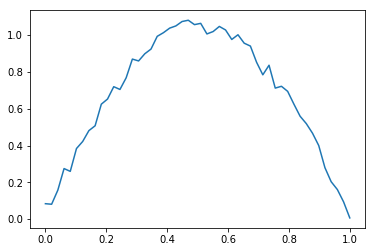

In [3]:
from matplotlib import pyplot
pyplot.plot(x, y1)
pyplot.show()

We can add labels and titles:

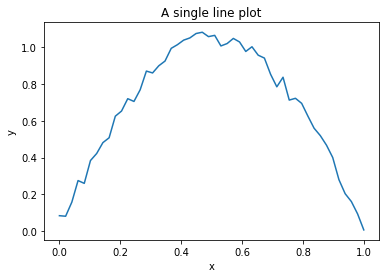

In [4]:
pyplot.plot(x, y1)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.title('A single line plot')
pyplot.show()

We can change the plotting style, and use LaTeX style notation where needed:

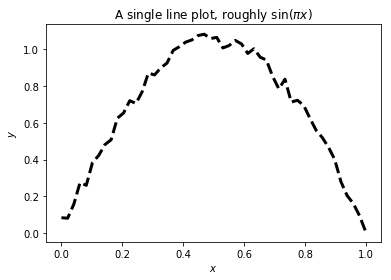

In [5]:
pyplot.plot(x, y1, linestyle='--', color='black', linewidth=3)
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$y$')
pyplot.title(r'A single line plot, roughly $\sin(\pi x)$')
pyplot.show()

We can plot two lines at once, and add a legend, which we can position:

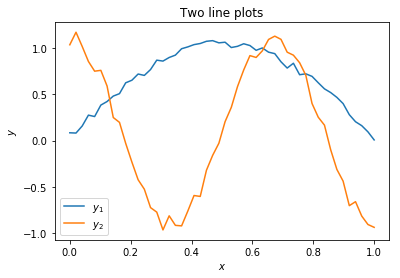

In [6]:
pyplot.plot(x, y1, label=r'$y_1$')
pyplot.plot(x, y2, label=r'$y_2$')
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$y$')
pyplot.title('Two line plots')
pyplot.legend(loc='lower left')
pyplot.show()

We would probably prefer to use subplots. At this point we have to leave the simple interface, and start building the plot using its individual components, `figures` and `axes`, which are objects to manipulate:

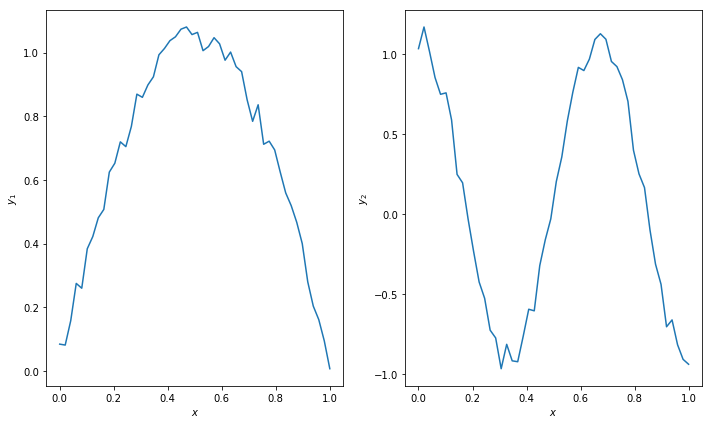

In [7]:
fig, axes = pyplot.subplots(nrows=1, ncols=2, figsize=(10,6))
axis1 = axes[0]
axis1.plot(x, y1)
axis1.set_xlabel(r'$x$')
axis1.set_ylabel(r'$y_1$')
axis2 = axes[1]
axis2.plot(x, y2)
axis2.set_xlabel(r'$x$')
axis2.set_ylabel(r'$y_2$')
fig.tight_layout()
pyplot.show()

The `axes` variable contains all of the separate axes that you may want. This makes it easy to construct many subplots using a loop:

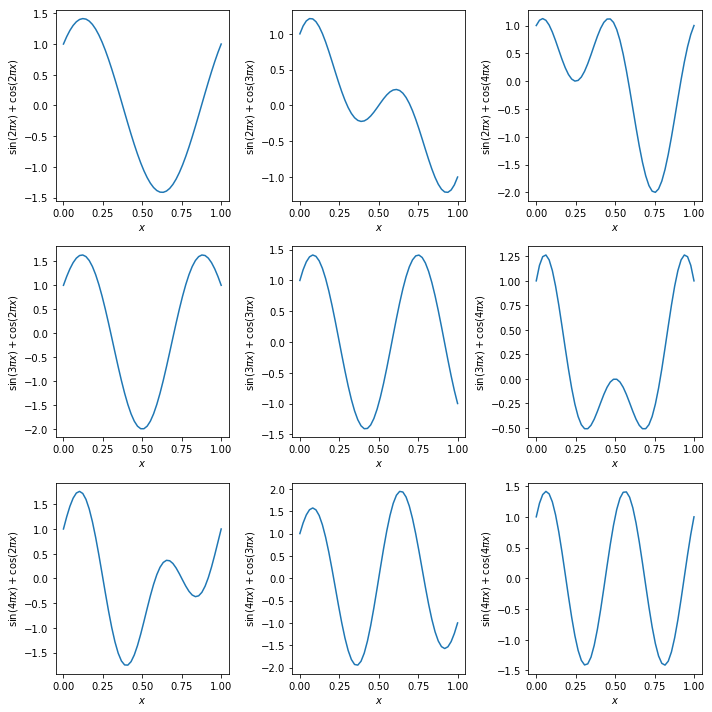

In [8]:
data = []
for nx in range(2,5):
    for ny in range(2,5):
        data.append(numpy.sin(nx * numpy.pi * x) + numpy.cos(ny * numpy.pi * x))

fig, axes = pyplot.subplots(nrows=3, ncols=3, figsize=(10,10))
for nrow in range(3):
    for ncol in range(3):
        ndata = ncol + 3 * nrow
        axes[nrow, ncol].plot(x, data[ndata])
        axes[nrow, ncol].set_xlabel(r'$x$')
        axes[nrow, ncol].set_ylabel(r'$\sin({} \pi x) + \cos({} \pi x)$'.format(nrow+2, ncol+2))
fig.tight_layout()
pyplot.show()

Matplotlib will allow you to generate and place axes pretty much wherever you like, to use logarithmic scales, to do different types of plot, and so on. Check the [examples](https://matplotlib.org/examples/index.html) and [gallery](https://matplotlib.org/gallery.html) for details.

##### Exercise

The logistic map builds a sequence of numbers $\{ x_n \}$ using the relation
$$
  x_{n+1} = r x_n \left( 1 - x_n \right),
$$
where $0 \le x_0 \le 1$.

* Write a program that calculates the first $N$ members of the sequence, given as input $x_0$ and $r$ (and, of course, $N$).
* Fix $x_0=0.5$. Calculate the first 2,000 members of the sequence for $r=1.5$ and $r=3.5$ Plot the last 100 members of the sequence in both cases. What does this suggest about the long-term behaviour of the sequence?
* Fix $x_0 = 0.5$. For each value of $r$ between $1$ and $4$, in steps of $0.01$, calculate the first 2,000 members of the sequence. Plot the last 1,000 members of the sequence on a plot where the $x$-axis is the value of $r$ and the $y$-axis is the values in the sequence. Do not plot lines - just plot markers (e.g., use the `'k.'` plotting style).

In [9]:
def logistic(x0, r, N = 1000):
    sequence = [x0]
    xn = x0
    for n in range(N):
        xnew = r*xn*(1.0-xn)
        sequence.append(xnew)
        xn = xnew
    return sequence

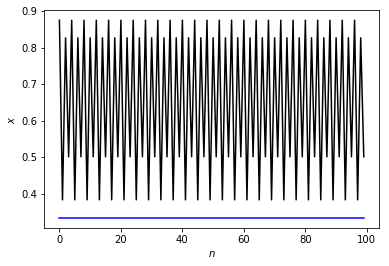

In [10]:
x0 = 0.5
N = 2000
sequence1 = logistic(x0, 1.5, N)
sequence2 = logistic(x0, 3.5, N)
pyplot.plot(sequence1[-100:], 'b-', label = r'$r=1.5$')
pyplot.plot(sequence2[-100:], 'k-', label = r'$r=3.5$')
pyplot.xlabel(r'$n$')
pyplot.ylabel(r'$x$')
pyplot.show()

This suggests that, for $r=1.5$, the sequence has settled down to a fixed point. In the $r=3.5$ case it seems to be moving between four points repeatedly.

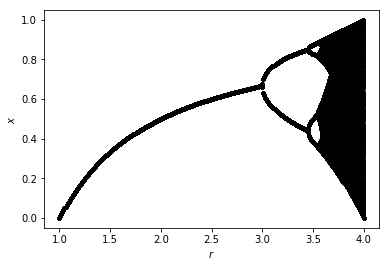

In [11]:
# This is the "best" way of doing it, but we may not have much numpy yet
# r_values = numpy.arange(1.0, 4.0, 0.01)
# This way only uses lists
r_values = []
for i in range(302):
    r_values.append(1.0 + 0.01 * i)
x0 = 0.5
N = 2000
for r in r_values:
    sequence = logistic(x0, r, N)
    pyplot.plot(r*numpy.ones_like(sequence[1000:]), sequence[1000:], 'k.')
pyplot.xlabel(r'$r$')
pyplot.ylabel(r'$x$')
pyplot.show()

The first transition from fixed point to limit cycle is at $r \approx 3$, the next at $r \approx 3.45$, the next at $r \approx 3.55$. The transition to chaos appears to happen before $r=4$, but it's not obvious exactly where.